In [83]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [84]:
X_train = np.linspace(-1, 1, 20)
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])
X_test = np.linspace(-1, 1, 20)
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

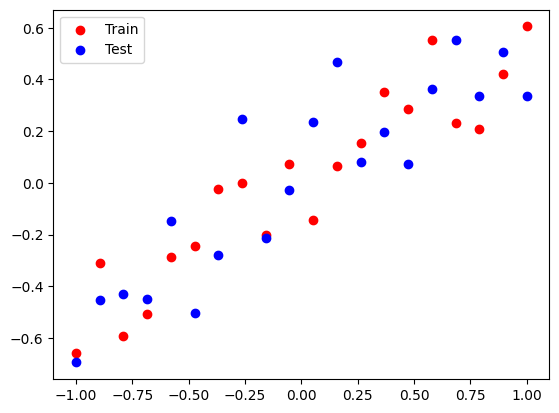

In [85]:
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.legend()
plt.show()

#### Without Dropout

In [86]:
model_1 = Sequential([
Dense(128, input_dim=1, activation="relu"),
Dense(128, activation="relu"),
Dense(1, activation="linear") ])

## to chnage default LR used Adam Fucntion 
adam = Adam(learning_rate=0.01)
model_1.compile(loss='mse', optimizer=adam, metrics=['mse'])
history = model_1.fit(X_train, y_train, epochs=100, 
                    validation_data = (X_test, y_test),
                    verbose=0)

In [87]:
y_pred_1=model_1.predict(y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


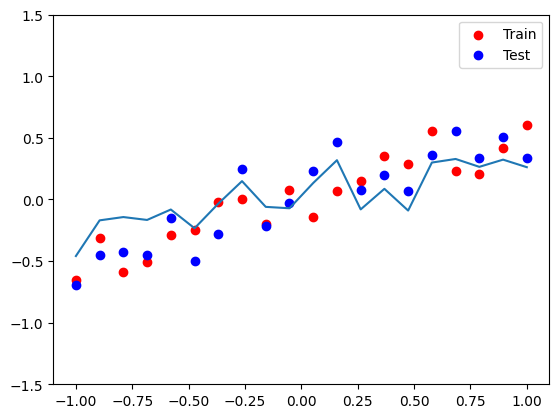

In [88]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_1)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

In [89]:
train_mse = model_1.evaluate(X_train, y_train, verbose=0)
test_mse = model_1.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: [0.011404816061258316, 0.011404816061258316], Test: [0.03744294494390488, 0.03744294494390488]


###  Dropout Model

In [94]:
mode_2 = Sequential([
    Dense(128, activation="relu", input_shape=(1,)),
    Dropout(0.5),  # 25% dropout
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="linear")  # good for regression
])

adam = Adam(learning_rate=0.01)
mode_2.compile(optimizer=adam,loss="mse",metrics=["mse"])
mode_2.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1288 - mse: 0.1288 - val_loss: 0.0311 - val_mse: 0.0311
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 0.0248 - mse: 0.0248 - val_loss: 0.0532 - val_mse: 0.0532
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 0.0402 - mse: 0.0402 - val_loss: 0.0654 - val_mse: 0.0654
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 0.0553 - mse: 0.0553 - val_loss: 0.0388 - val_mse: 0.0388
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.0313 - mse: 0.0313 - val_loss: 0.0295 - val_mse: 0.0295
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.0180 - mse: 0.0180 - val_loss: 0.0362 - val_mse: 0.0362
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0464 - val_mse: 0.0464
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 0.0508 - mse: 0.0508 - val_loss: 0.0512 - val_mse: 0.0512
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - loss: 0.0430 -

In [91]:
y_pred_2=mode_2.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


In [92]:
train_mse = mode_2.evaluate(X_train, y_train, verbose=0)
test_mse = mode_2.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: [0.014157732017338276, 0.014157732017338276], Test: [0.03285295516252518, 0.03285295516252518]


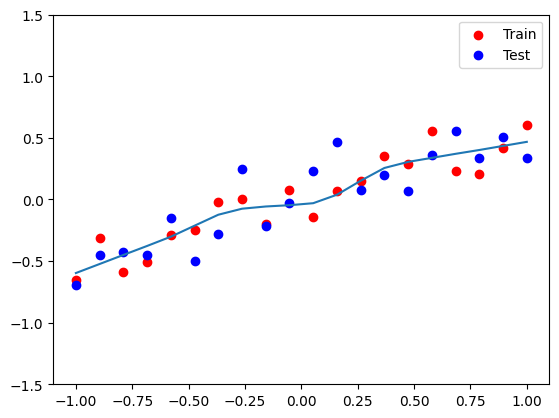

In [93]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

So before dropout Train: [0.00459341099485755, 0.00459341099485755], Test: [0.04680366441607475, 0.04680366441607475]<br>
the testing loss was 10 times training loss<br>
So after dropout Train: Train: [0.034809160977602005, 0.034809160977602005], Test: [0.046576570719480515, 0.046576570719480515]<br>
the testing loss and training loss are similar<br>

#### So dropout reduces overfitting 

